Pilih mode tes:
1. Tes dengan file upload
2. Tes dengan webcam
Masukkan pilihan (1/2): 1


FileUpload(value={}, accept='.jpg,.png', description='Upload')

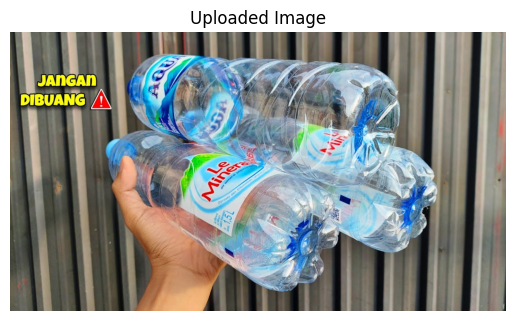

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
Predicted Class: plastic


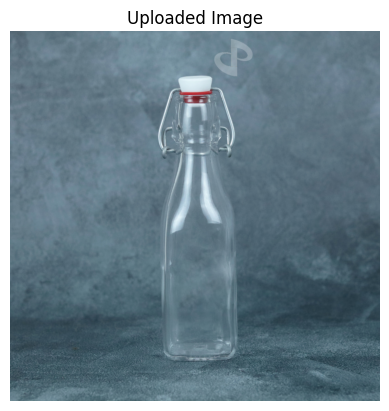

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Class: white-glass


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load model yang telah dilatih
model_path = 'model_capstonelancar (2).h5'  # Path ke model yang disimpan
model = load_model(model_path)

# Class labels
class_labels = [
    'battery', 'biological', 'brown-glass', 'cardboard', 'clothes',
    'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass'
]

# Fungsi untuk memuat dan memproses gambar
def preprocess_image(image, target_size=(299, 299)):
    image = cv2.resize(image, target_size)
    image = image / 255.0  # Normalisasi
    image = np.expand_dims(image, axis=0)  # Tambahkan dimensi batch
    return image

# **Tes Menggunakan File Upload**
def test_with_uploaded_file():
    from IPython.display import display
    from ipywidgets import FileUpload

    upload = FileUpload(accept='.jpg,.png', multiple=False)
    display(upload)

    def on_upload_change(change):
        for filename, file in upload.value.items():
            content = file['content']
            np_image = np.frombuffer(content, np.uint8)
            img = cv2.imdecode(np_image, cv2.IMREAD_COLOR)

            # Tampilkan gambar
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title("Uploaded Image")
            plt.axis("off")
            plt.show()

            # Preprocess dan prediksi
            processed_img = preprocess_image(img)
            predictions = model.predict(processed_img)[0]
            predicted_class = class_labels[np.argmax(predictions)]
            print(f"Predicted Class: {predicted_class}")

    upload.observe(on_upload_change, names='value')

# **Tes Menggunakan Webcam**
def test_with_webcam():
    print("Tekan 'q' untuk keluar.")
    cap = cv2.VideoCapture(0)  # Gunakan kamera webcam

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Tidak dapat mengakses kamera.")
            break

        # Tampilkan frame
        cv2.imshow('Webcam', frame)

        # Proses dan prediksi
        processed_frame = preprocess_image(frame)
        predictions = model.predict(processed_frame)[0]
        predicted_class = class_labels[np.argmax(predictions)]
        print(f"Predicted Class: {predicted_class}", end='\r')  # Tampilkan di terminal

        # Keluar dengan 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Pilihan untuk dijalankan
print("Pilih mode tes:")
print("1. Tes dengan file upload")
print("2. Tes dengan webcam")
choice = input("Masukkan pilihan (1/2): ")

if choice == '1':
    test_with_uploaded_file()
elif choice == '2':
    test_with_webcam()
else:
    print("Pilihan tidak valid.")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful